In [ ]:
# Gapminder case study - The main motto of this case study is to explan basic operation and visualization in R.
# this case study is a part of HarvardX data science course. I just tried to explain what i understood from it.
# Feel free to suggest improvements and mistakes (if you find any).

In [1]:
library(dslabs) # for dataset
library(tidyverse)
library(dplyr)
options(repr.plot.width=8, repr.plot.height=4) # to resize the plots

Warning message:
"package 'dslabs' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() mask

# Basic Operations 

In [2]:
# Load dataset
data(gapminder) # it will load data in a variable name same as dataset. In this case gapminder.

Gapminder dataset is a dataset provided by Gapminder.org. It is a dataset containing gdp, fertilityrate, mortalityrate for different countries. Main target of our case study is to observe few keyfact:
1. Is there any relationship between fertility rate and mortality rate?
2. Which continent has more developed countries and developing or poor countries?
3. Is there any change in status of poor or developing countries in terms of gdp?
4. Are poor countries getting poorer?

There are many questions which we will try to understand using this case study. Few keypoints:
a. Fertility Rate: It is the average number of child a woman can have.
b. Infant Mortality Rate: How long child live?
c. GDP: a basic but rough idea to define how rich is your country.
d. Mortality Rate: What is the average life span.

I think other fields are pretty much clear with there name.

In [3]:
# Explore dataset
head(gapminder) # load top 6 rows of the dataset

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [4]:
# Explore columns
names(gapminder)

[1] "country"          "year"             "infant_mortality" "life_expectancy" 
[5] "fertility"        "population"       "gdp"              "continent"       
[9] "region"

In [11]:
# Rows and column counts
cat("rows:", nrow(gapminder))
cat("\ncols: ", ncol(gapminder))

rows: 10545
cols:  9

In [12]:
# Structure of dataset
str(gapminder)

'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


In [14]:
# explore categorical variable - e.g. region, country, continent in this case
class(gapminder$continent) # class tells you the type f variable. The type of categorical variable is factor

[1] "factor"

In [16]:
# different values in categorical variable
levels(gapminder$continent)

[1] "Africa"   "Americas" "Asia"     "Europe"   "Oceania"

In [17]:
# total number of different value in a categorical variable
length(levels(gapminder$continent))  # so there are 5 different values

[1] 5

In [19]:
# Accessing Column
gapminder$continent[1:2] # In R index starts from 1 unlike python.

[1] Europe Africa
Levels: Africa Americas Asia Europe Oceania

In [21]:
# Accessing multiple columns - select function of dplyr library
gapminder %>% select(c("country", "continent", "gdp")) #it will select three columns

country,continent,gdp
Albania,Europe,NA
Algeria,Africa,13828152297
Angola,Africa,NA
Antigua and Barbuda,Americas,NA
Argentina,Americas,108322326649
Armenia,Asia,NA
Aruba,Americas,NA
Australia,Oceania,96677859364
Austria,Europe,52392699681
Azerbaijan,Asia,NA


In [22]:
# you can access column by index also
gapminder %>% select(c(1, 2, 3))

country,year,infant_mortality
Albania,1960,115.40
Algeria,1960,148.20
Angola,1960,208.00
Antigua and Barbuda,1960,NA
Argentina,1960,59.87
Armenia,1960,NA
Aruba,1960,NA
Australia,1960,20.30
Austria,1960,37.30
Azerbaijan,1960,NA


In [23]:
# Access columns using index slicing
gapminder %>% select(1:4) # it will access index 1, 2, 3, 4 (first four rows)

country,year,infant_mortality,life_expectancy
Albania,1960,115.40,62.87
Algeria,1960,148.20,47.50
Angola,1960,208.00,35.98
Antigua and Barbuda,1960,NA,62.97
Argentina,1960,59.87,65.39
Armenia,1960,NA,66.86
Aruba,1960,NA,65.66
Australia,1960,20.30,70.87
Austria,1960,37.30,68.75
Azerbaijan,1960,NA,61.33


In [46]:
# filter - You can filter your dataset using filter function of dplyr
gapminder %>% filter(infant_mortality>200 & region == 'Northern Africa')

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Egypt,1960,209.6,48.31,6.63,27072397,12008501551,Africa,Northern Africa
Egypt,1961,202.7,48.89,6.61,27810001,12536920098,Africa,Northern Africa


In [52]:
# Adding a new column
# we will add new column called dollar_per_day - it shows the per day income of a person in dollars

gapminder <- gapminder %>% mutate(dollars_per_day =  gdp/population/365)

In [53]:
# so now we can see our dataset has new column called dollars_per_day
names(gapminder)

[1] "country"          "year"             "infant_mortality" "life_expectancy" 
 [5] "fertility"        "population"       "gdp"              "continent"       
 [9] "region"           "dollars_per_day"

In [54]:
# Selecting a subset in a new dataframe
new_dataset <- gapminder %>% select(c("country", "region", "continent", "dollars_per_day"))

In [55]:
head(new_dataset)

country,region,continent,dollars_per_day
Albania,Southern Europe,Europe,NA
Algeria,Northern Africa,Africa,3.405458
Angola,Middle Africa,Africa,NA
Antigua and Barbuda,Caribbean,Americas,NA
Argentina,South America,Americas,14.393153
Armenia,Western Asia,Asia,NA


# Visualizations

In [56]:
# For visualization we will use ggplot(graphic grammer). It is enriched of useful functions.
# first we will create a ggplot object and then we add layers step-wise-step.
# In this way it is very easy to manage ggplots in R. Lets understand with and example.
# lets create a ggplot object and then store it to hist object, we will plot dollars_per_day histogram

# In the below code we are creating a ggplot object. aes means aesthetic layer, which will map dollars_per_day in x. As
# we are creating histgram, we do not need y axis maping. It will be needed in other multivariate plot, which we will 
# see later.
hist <- gapminder %>% ggplot(aes(x=dollars_per_day))

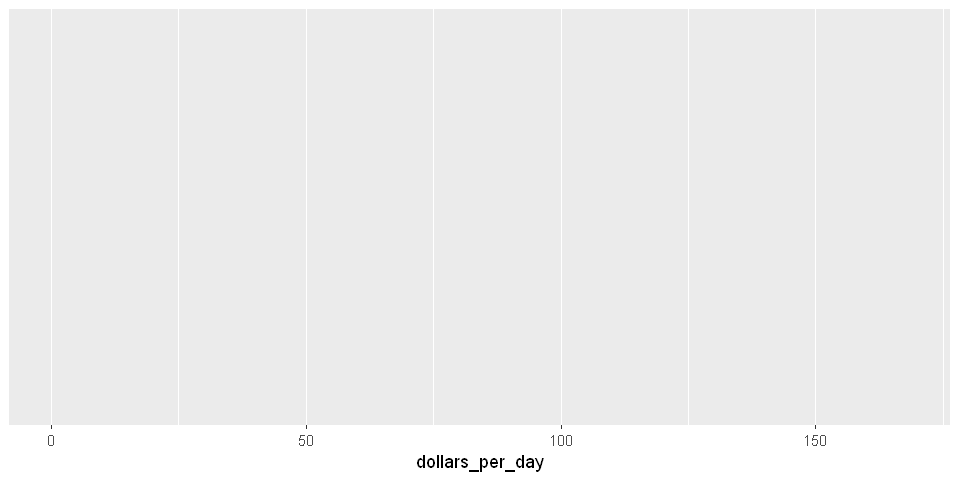

In [57]:
# so now if you see, we have an empty plot (object of ggplot) named hist.
hist # it will plot a gray empty area, as we have not plotted anything till now.

Warning message:
"Removed 2972 rows containing non-finite values (stat_bin)."

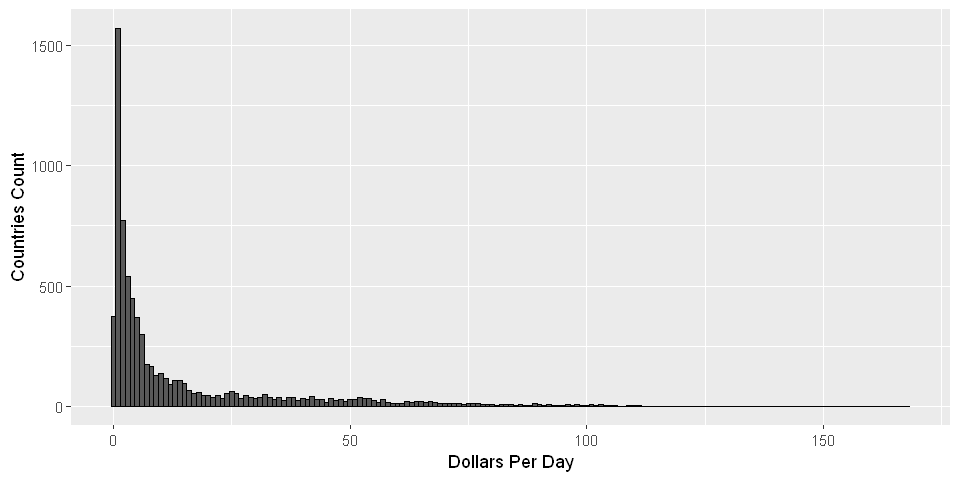

In [59]:
# so now lets add some layers.
hist + # + sign means we are adding layers
    geom_histogram(binwidth=1, color="black") + # add histogram
    xlab("Dollars Per Day") + # x-axis label
    ylab("Countries Count") # y-axis label

# so we can handle binwidth (here is 1) and color. So we can see histogram for dollars per day across the world.

Warning message:
"Removed 2972 rows containing non-finite values (stat_bin)."

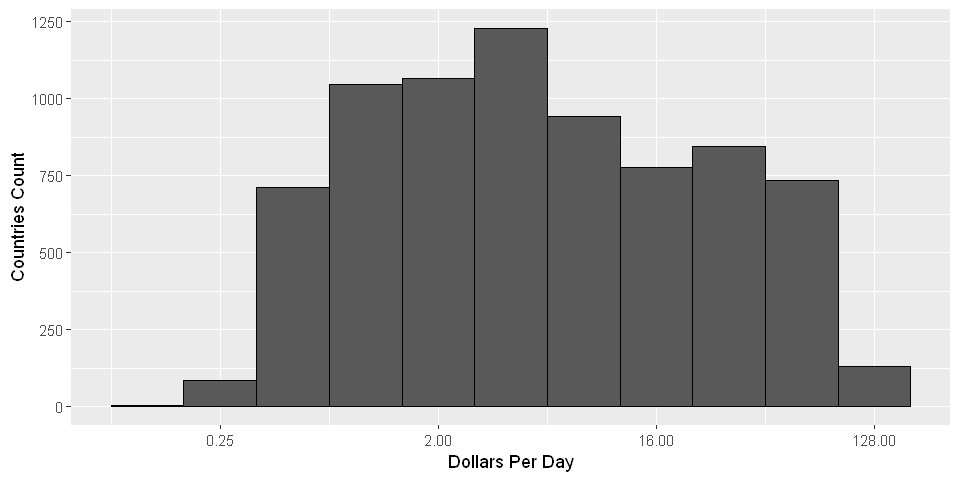

In [61]:
# but as we can see our data is not scaled lets normalized. So an easier way to do this add one layer to scale our data
# using log with base 2
hist + # + sign means we are adding layers
    geom_histogram(binwidth=1, color="black") + # add histogram
    xlab("Dollars Per Day") + # x-axis label
    ylab("Countries Count")+ # y-axis label
    scale_x_continuous(trans="log2")

In [62]:
# So now you can see data even clearer. We can say mostly countries has 4 dollars a day. So we can say most of the countries
# have less than 8 dollars per day value. But with the graph we are not clear, which countries are they? 
# or which region or continent. Lets try to make some changes in our histogram to find out this.


Warning message:
"Removed 2972 rows containing non-finite values (stat_bin)."

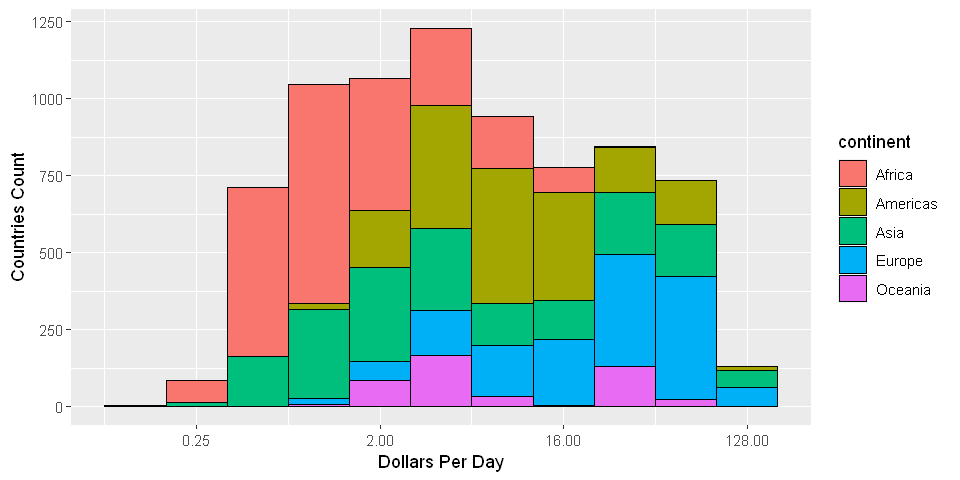

In [72]:
hist <- gapminder %>% ggplot(aes(x=dollars_per_day, fill=continent))

hist + # + sign means we are adding layers
    geom_histogram(binwidth=1, color="black") + # add histogram
    xlab("Dollars Per Day") + # x-axis label
    ylab("Countries Count")+ # y-axis label
    scale_x_continuous(trans="log2")

In [73]:
# so we added color but its not pretty clear. So our main was to tell you how to use ggplot. Now we will try to answer
# certain questions.

In [79]:
# first lets find out the minimum and maximum year. It will tell the range of data
sum <- gapminder %>% summarize(minyear=min(year), maxyear=max(year))

In [80]:
sum

minyear,maxyear
1960,2016


In [81]:
# so we have data from 1960 to 2016.

Our first question is: Is there any relationship between fertility and life expectency rate. So lets talk about generally first. In a general way, we can say more fertility rate means less mortality. Why this?
Second, generally developing countries has higher fertility rate than developed countries?
> As more fertility rate means more child and more child in poor and developing countries mean lack of resource in a family. So it may lead to less mortality rate. Well it is just a theory, Lets see whether can we prove it. Also we will check likewise for developed countries

# Scatter Plot

Warning message:
"Removed 187 rows containing missing values (geom_point)."

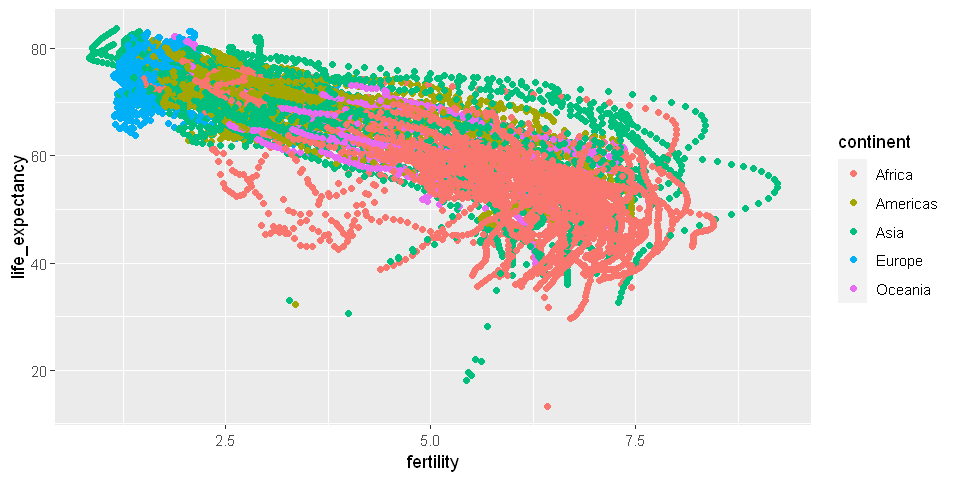

In [88]:
# we will plot a time series between fertility rate and mortality rate
ts <- gapminder %>% ggplot(aes(x=fertility, y=life_expectancy, col=continent))
ts+geom_point()

Warning message:
"Removed 4 rows containing missing values (geom_point)."

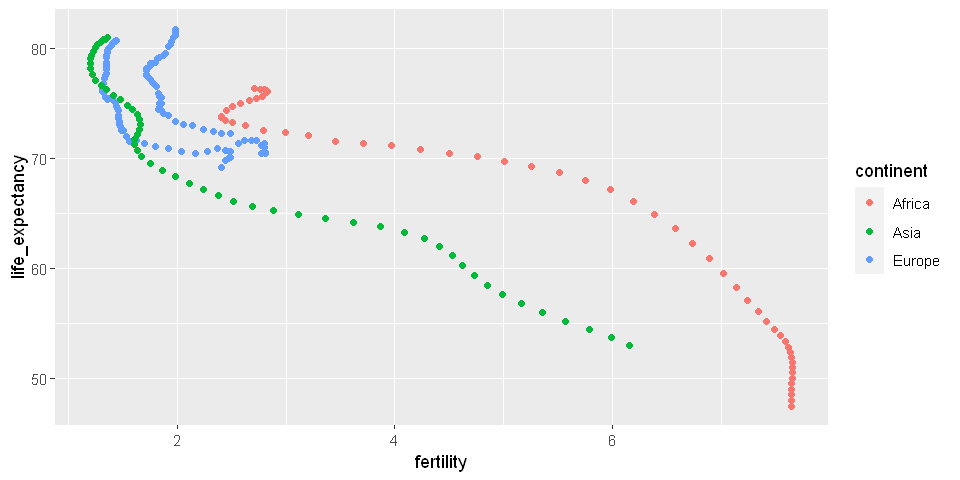

In [92]:
# So well we can see, there is a negative relationship As fertility going rightside(increasing), life expectecy going down(reducing).
# so as a data scientist no we have proof that fertility and life expectency behave inversly.
# but lets plot time series for two countries (one from poor or developing region, one developed).
ts <- gapminder %>% filter(country %in% c("South Korea", "Algeria", "France", "Germany")) %>% ggplot(aes(x=fertility, y=life_expectancy, col=continent))
ts+geom_point()

In [91]:
# So again we can see as Asia and African region mostly have developing countries and europe & north american countries
# are  mostly developed. So we can see a relation that mostly developed countries have less fertility rate, which makes
# sense. less family member means you need less money to take care of. It is not the only reason for the countries 
# economy or development but it is one of them.

In [93]:
# So finally our hyphothesis that developed countries have less fertility rate than developing or poor countries was correct.
# Also there is a inverse relationship between fertility and life span

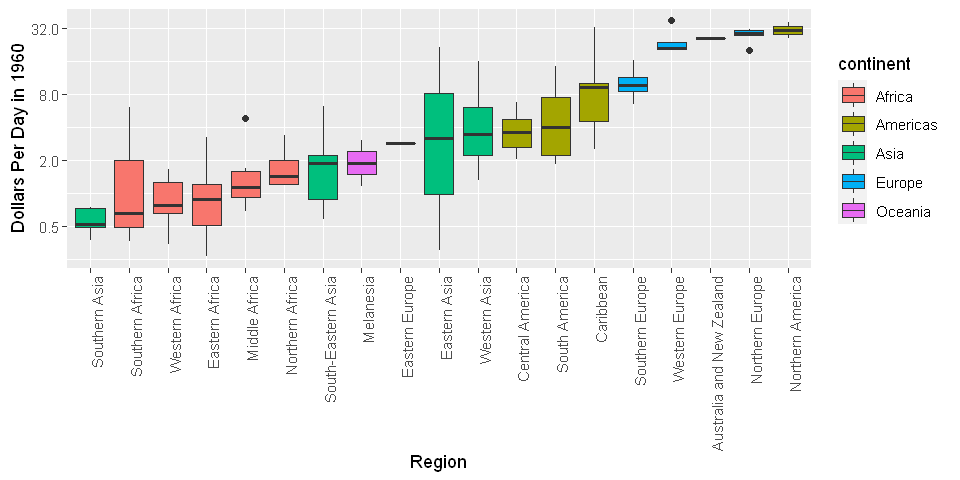

In [119]:
# Lets see the dollars per day income of all the countries in 1960 and then we will compare it to the dollars per day value
# of 2010 and try to find out is there any improvement in the income of various countries.
past_year<- 1960
box <- gapminder %>% filter(year == past_year & !is.na(dollars_per_day) ) %>% mutate(region = reorder(region, dollars_per_day, FUN = median)) %>% ggplot(aes(x=region, y=dollars_per_day, fill=continent))
    
box+geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    xlab("Region")+
    ylab("Dollars Per Day in 1960")+
    scale_y_continuous(trans = "log2")

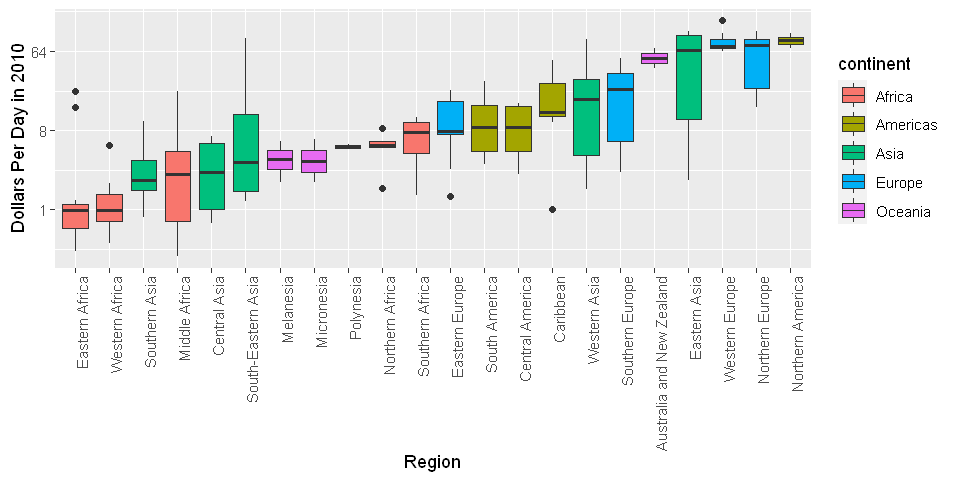

In [117]:
present_year<- 2010
box <- gapminder %>% filter(year == present_year & !is.na(dollars_per_day) ) %>% mutate(region = reorder(region, dollars_per_day, FUN = median)) %>% ggplot(aes(x=region, y=dollars_per_day, fill=continent))
    
box+geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    xlab("Region")+
    ylab("Dollars Per Day in 2010")+
    scale_y_continuous(trans = "log2")

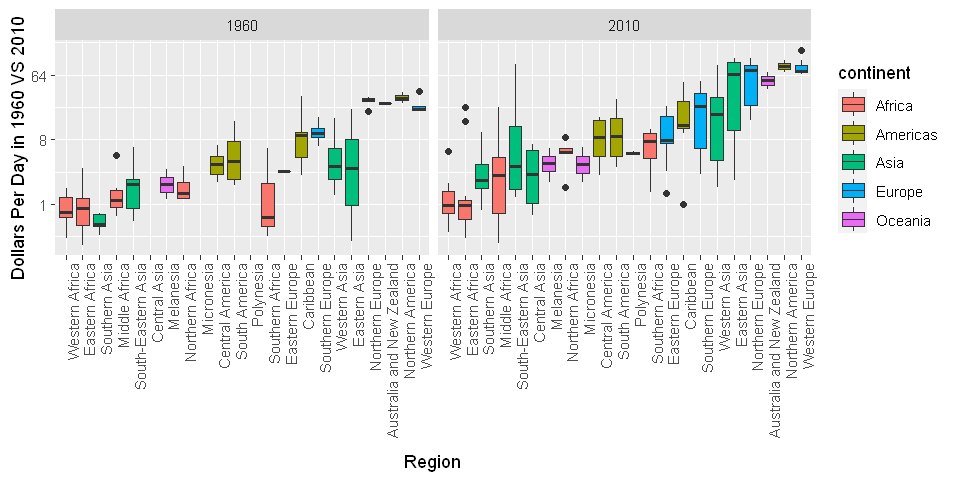

In [131]:
# So now we have data for both the years but its very hard to compare as both boxplots are not together.
# lets try to plot them together
present_year<- 2010
box <- gapminder %>% filter(year %in% c(past_year, present_year) & !is.na(dollars_per_day) ) %>% mutate(region = reorder(region, dollars_per_day, FUN = median)) %>% ggplot(aes(x=region, y=dollars_per_day, fill=continent))
    
box+geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    xlab("Region")+
    ylab("Dollars Per Day in 1960 VS 2010")+
    scale_y_continuous(trans = "log2")+
    facet_grid(.~year)

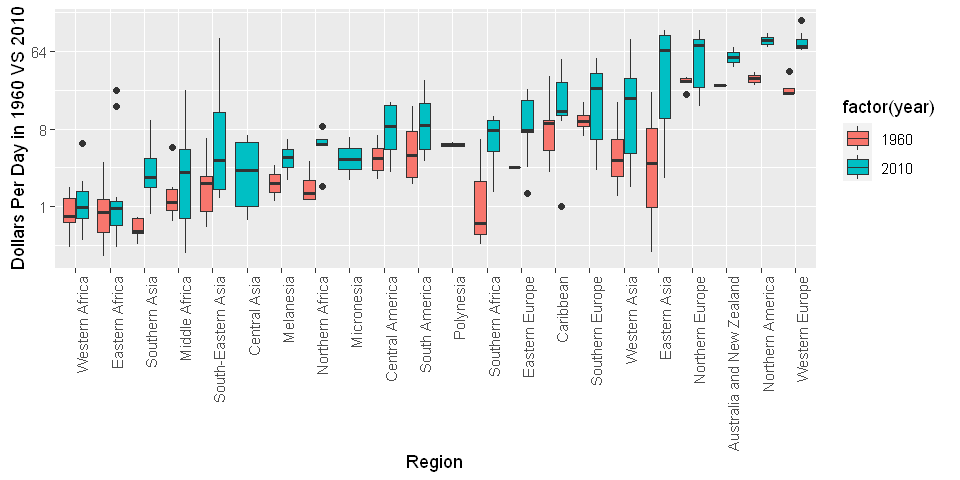

In [154]:
# we can do some change to make comparison even better. So change the fill property in ggplot with year but as year is an integer
# we have to convert it into factor
present_year<- 2010
box <- gapminder %>% filter(year %in% c(past_year, present_year) & !is.na(dollars_per_day) ) %>% mutate(region = reorder(region, dollars_per_day, FUN = median)) %>% ggplot(aes(x=region, y=dollars_per_day, fill=factor(year)))
    
box+geom_boxplot()+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
    xlab("Region")+
    ylab("Dollars Per Day in 1960 VS 2010")+
    scale_y_continuous(trans = "log2")
    

In [132]:
# So now we can see many countries improved in terms of dollars per day. We can see developing countries performed better than
# developed countries. Above diagram show that european and north american countries are on top in terms of income.

# Time Series

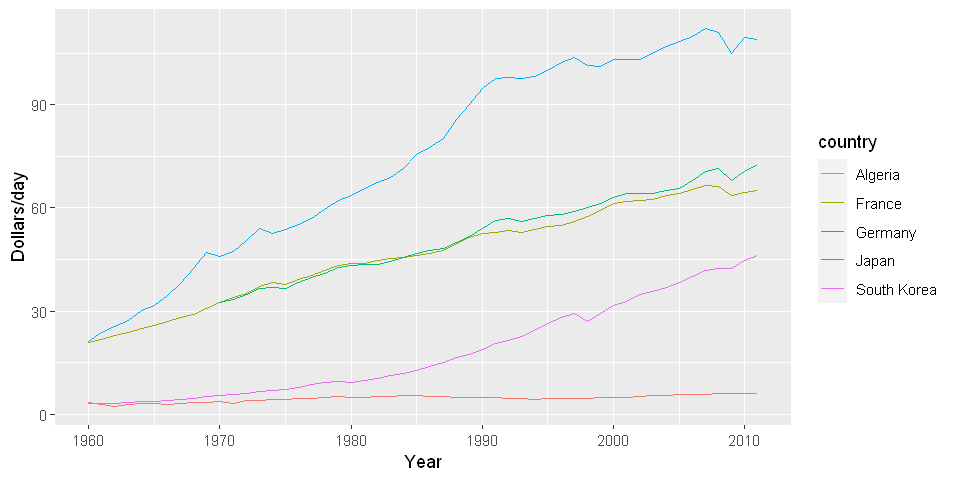

In [139]:
# Time series is a special kind of plot where we plot date or time or some instance of time in x-axis.
# we can use line plot to generate a time series. 
# lets compare time series of some countries, We will see how they improved in terms of income(dollars per day).
countries <- c("Algeria", "France", "South Korea", "Japan", "Germany")
ts <- gapminder %>% filter(country %in% countries & !is.na(dollars_per_day)) %>% ggplot(aes(x=year, y=dollars_per_day, col=country))

ts+geom_line()+
xlab("Year")+
ylab("Dollars/day")

In [140]:
# so above plot shows how these countries improved their economy since 1960. Japan showing an incredible increase.
# but if we see algeria. It doesnt have a significant growth. Lets compare the fertility rate of the same countries

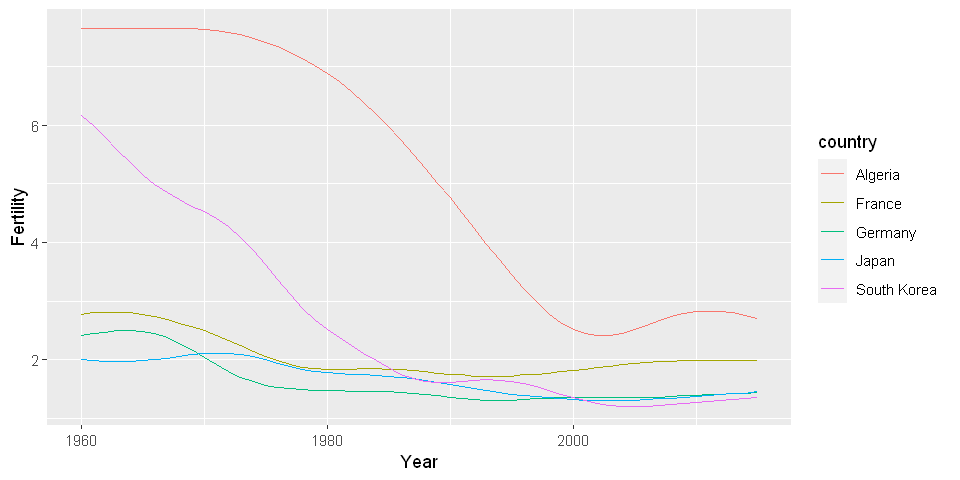

In [142]:
ts <- gapminder %>% filter(country %in% countries & !is.na(fertility)) %>% ggplot(aes(x=year, y=fertility, col=country))

ts+geom_line()+
xlab("Year")+
ylab("Fertility")

In [143]:
# We can see algeria and south korea have a huge decrease in fertility rate.

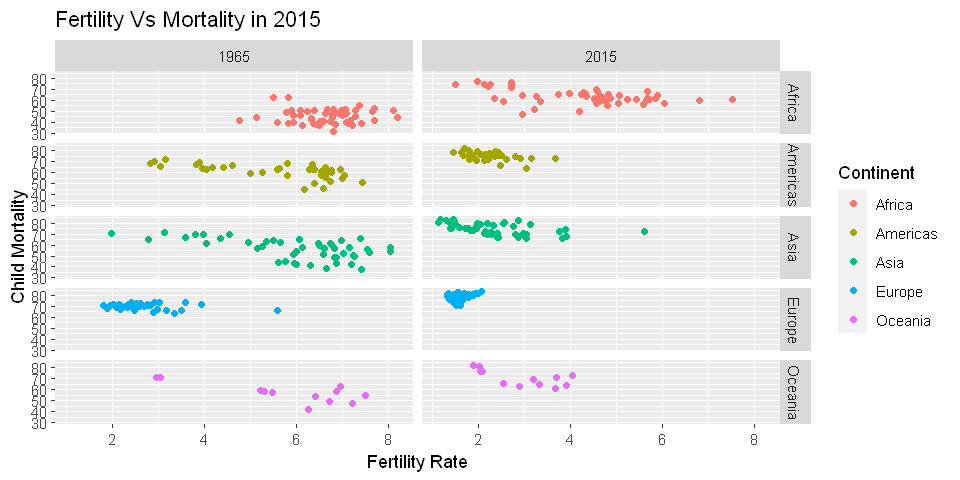

In [147]:
# Faceting - It is useful when you have to plot multiple plot together
plt <- gapminder %>% filter(year %in% c(1965, 2015) & !is.na(life_expectancy)  & !is.na(fertility)) %>% ggplot(aes(x=fertility, y=life_expectancy))
plt+geom_point(aes(col=continent))+
xlab("Fertility Rate")+
ylab("Child Mortality")+
ggtitle("Fertility Vs Mortality in 2015")+
scale_color_discrete("Continent")+
facet_grid(continent~year)

In [148]:
# So here we can see how fertiity rate is decreasing and life expectency increasing acros the world.

In [155]:
# So finally i think we have answers to all the question. There are many things which we interpret from these visualization. 
# I hope it was useful to you.

In [ ]:
# Thanks and Upvote if you like it.